In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from statistics import mean as st_mean

from FH_Functions import opt_fracs, get_truncated_normal, search_data

In [2]:
bestAction = np.load('./Policies/DP_bestAction_mu5_sig1_lam4_N5_s501_A101.npy')

bestActionQL = np.load('./Policies/QL_bestAction_mu5_sig1_lam4_N5_s501_A101.npy')

DQN_acts = np.load('./Policies/DQN_bestAction_mu5_sig1_lam4_N5_s501_A101.npy')

# Gives improved rollout policy
Roll_acts = np.load('./Policies/Rollout_bestAction_mu5_sig1_lam4_N5_s501_A101.npy')

In [3]:
# VARIABLES CONTROL VALUES IN ALL FOLLOWING PARALLEL PROCESSES
mean = 0.5
std = 0.1
lam = 0.4
N = 5
Nstates = 501
delta = 1/Nstates
Nactions = 101

theta_dist = get_truncated_normal(mean, std, 0, 1)
np.random.seed(0)
n_samples = 1000
thetas = theta_dist.rvs(size=n_samples)

DP_cost = []
QL_cost = [] 
QS_cost = []

DP_acts = np.zeros(5)
QL_acts = np.zeros(5)

S501 = np.linspace(0,1,501)

N_step = 5
QsPol  = (1/2 - lam/4)*np.ones(N_step)

for theta in thetas:

    DP_data = search_data()
    DP_data.Non_uni_search_dist(lam, theta, S501, bestAction[-N_step:, :, :])
    DP_cost.append(DP_data.cost)
    DP_acts += np.array(DP_data.acts)

    QL_data = search_data()
    QL_data.Non_uni_search_dist(lam, theta, S501, bestActionQL[-N_step:, :, :])
    QL_cost.append(QL_data.cost)
    QL_acts += np.array(QL_data.acts)

    QS_data = search_data()
    QS_data.uni_search(lam, theta, delta, S501, QsPol)
    QS_cost.append(QS_data.cost)

print("DP cost: %.4f"%st_mean(DP_cost))
print("QL cost: %.4f"%st_mean(QL_cost))
print("QS cost: %.4f"%st_mean(QS_cost))
DP_acts /= 1000
QL_acts /= 1000

DP cost: 0.2719
QL cost: 0.3154
QS cost: 0.3538


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


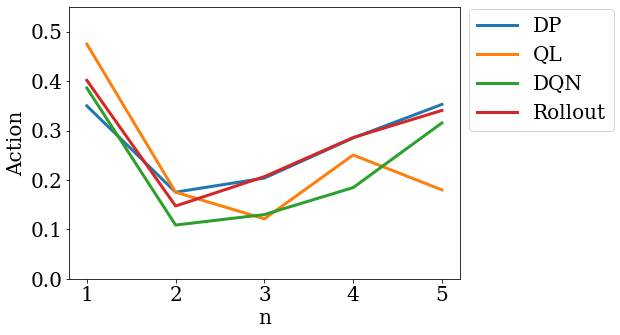

In [6]:
fig1 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)
a1 = fig1.add_subplot(111)

steps = np.arange(1, 6)
plt.plot(steps, DP_acts,label='DP', linewidth=3)
plt.plot(steps, QL_acts, label='QL', linewidth=3)
plt.plot(steps, DQN_acts, label='DQN', linewidth=3)
plt.plot(steps, Roll_acts, label='Rollout', linewidth=3)
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1.03), prop={'size': 20});
plt.ylim(0, 0.55)
a1.set_ylabel('Action',fontsize=20)
a1.set_xlabel('n',fontsize=20);

fig1.savefig('NonuniformPolicyComparison.eps',bbox_inches='tight');

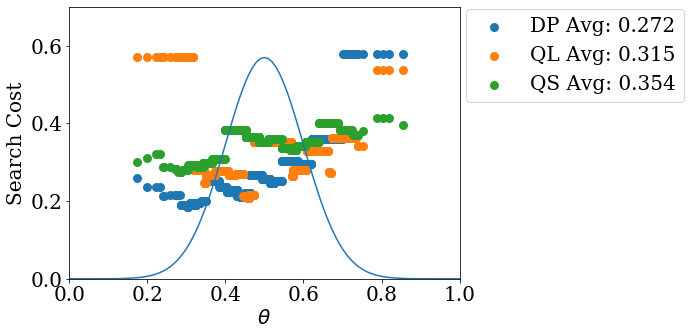

In [7]:
fig1 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)
a1 = fig1.add_subplot(111)
DPc = '%.3f'%st_mean(DP_cost)
QLc = '%.3f'%st_mean(QL_cost)
QSc = '%.3f'%st_mean(QS_cost)

tn = get_truncated_normal(mean, std, 0, 1)
x = np.linspace(0,1,101)
plt.plot(x,tn.pdf(x)/7)
plt.scatter(thetas,DP_cost,label='DP Avg: '+DPc,linewidths=3)
plt.scatter(thetas,QL_cost,label='QL Avg: '+QLc,linewidths=3)
plt.scatter(thetas,QS_cost,label='QS Avg: '+QSc,linewidths=3)
# plt.scatter(thetas,Roll_cost,label='Avg: '+rc,linewidths=3)

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.03), prop={'size': 20});

a1.set_ylabel('Search Cost',fontsize=20)
a1.set_xlabel(r'$\theta$',fontsize=20);
a1.set_xlim([0,1.0])
a1.set_ylim([0,0.7]);

# fig1.tight_layout()
# fig1.savefig('NonUniformCostCompareRollout.eps',bbox_inches='tight');